# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 11 </span>
## <span style="color:orange"> Keras - Neural Network regression </span>

### Overview 

In this notebook our task will be to perform machine learning regression on noisy data with a Neural Network (NN).

We will explore how the ability to fit depends on the structure of the NN. The goal is also to build intuition about why prediction is difficult.

### The Prediction Problem

Consider a probabilistic process that gives rise to labeled data $(x,y)$. The data is generated by drawing samples from the equation

$$
    y_i= f(x_i) + \eta_i,
$$

where $f(x_i)$ is some fixed, but (possibly unknown) function, and $\eta_i$ is a Gaussian, uncorrelate noise variable such that

$$
\langle \eta_i \rangle=0 \\
\langle \eta_i \eta_j \rangle = \delta_{ij} \sigma
$$

We will refer to the $f(x_i)$ as the **true features** used to generate the data. 

To make predictions, we will consider a NN that depends on its parameters, weights and biases. The functions that the NN can model respresent the **model class** that we are using to try to model the data and make predictions.

To learn the parameters of the NN, we will train our models on a **training data set** and then test the effectiveness of the NN on a *different* dataset, the **validation data set**. The reason we must divide our data into a training and test dataset is that the point of machine learning is to make accurate predictions about new data we have not seen.

To measure our ability to predict, we will learn our parameters by fitting our training dataset and then making predictions on our test data set. One common measure of predictive  performance of our algorithm is to compare the predictions,$\{y_j^\mathrm{pred}\}$, to the true values $\{y_j\}$. A commonly employed measure for this is the sum of the mean square-error (MSE) on the test set:
$$
MSE= \frac{1}{N_\mathrm{test}}\sum_{j=1}^{N_\mathrm{test}} (y_j^\mathrm{pred}-y_j)^2
$$

We will try to get a qualitative picture by examining plots on validation and training data.

### Linear fit

We start by considering the very simple case:
$$
f(x)=2x+1
$$

Let's start defining the parameters of an ideal linear function which we are going to predict through a neural network regression

In [18]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

Now let's generate a set of input data which will slightly deviate from our ideal behaviour using a random noise (that actually is set to zero):

In [19]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.3 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

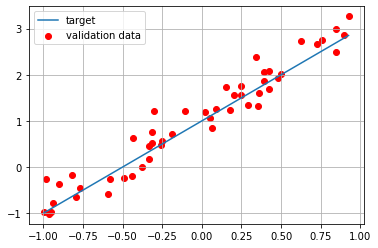

In [20]:
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

If you remember how a single node of a neural network works, you can easily spot that **just a single neuron can make the job**. So let's start using a simple Sequential model with just one layer on one neuron only!

In [21]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [22]:
# get a summary of our composed model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


We are now going to train our model, that is we feed the neuron with the set of training pair x, y_train from which the optimizer will find the best weights to minimize the Mean Square Error loss function (out linear regression function).

In [23]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/30
16/16 [==============================] - 1s 20ms/step - loss: 1.2687 - mse: 1.2687 - val_loss: 1.0852 - val_mse: 1.0852
Epoch 2/30
16/16 [==============================] - 0s 7ms/step - loss: 0.8452 - mse: 0.8452 - val_loss: 0.7479 - val_mse: 0.7479
Epoch 3/30
16/16 [==============================] - 0s 7ms/step - loss: 0.5936 - mse: 0.5936 - val_loss: 0.5485 - val_mse: 0.5485
Epoch 4/30
16/16 [==============================] - 0s 6ms/step - loss: 0.4433 - mse: 0.4433 - val_loss: 0.4177 - val_mse: 0.4177
Epoch 5/30
16/16 [==============================] - 0s 7ms/step - loss: 0.3453 - mse: 0.3453 - val_loss: 0.3307 - val_mse: 0.3307
Epoch 6/30
16/16 [==============================] - 0s 7ms/step - loss: 0.2798 - mse: 0.2798 - val_loss: 0.2720 - val_mse: 0.2720
Epoch 7/30
16/16 [==============================] - 0s 7ms/step - loss: 0.2348 - mse: 0.2348 - val_loss: 0.2293 - val_mse: 0.2293
Epoch 8/30
16/16 [==============================] - 0s 7ms/step - loss: 0.2019 - mse: 0.2

By looking at weights and biases we can see if the linear fit was successfull: $w_1$ represents the angular coefficient, $b$ the intercept.

In [24]:
# return weights and biases
model.get_weights()

[array([[1.9840865]], dtype=float32), array([0.9667753], dtype=float32)]

In [25]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 12ms/step - loss: 0.1002 - mse: 0.1002

Test loss: 0.10021200031042099
Test accuracy: 0.10021200031042099


In [26]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - mse: 0.0011    

Test loss: 0.0011293066199868917
Test accuracy: 0.0011293066199868917


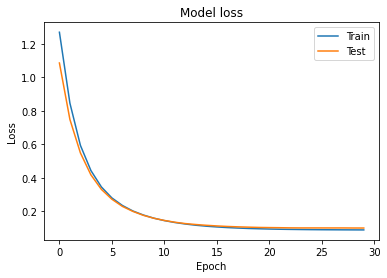

In [27]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

4/4 [==============================] - 0s 3ms/step


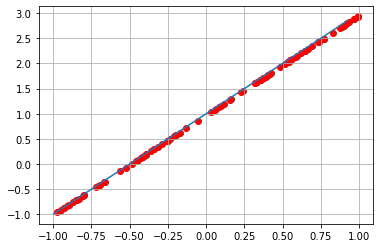

In [28]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
#print(x_predicted)
#print(y_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

### Exercise 11.1

In order to make practice with NN, explore how does the previous linear regression depend on the number of epochs, $N_{\mathrm{epochs}}$, the number of data points $N_{\mathrm{train}}$ and on the noise $\sigma$. Try to improve the previous result operating on these parameters.

<span style="color:green"> Aumentando $N_{train}$ e/o $N_{epochs}$ e/o diminuendo $\sigma$, $\omega_{1}$ e $b$ si avvicinano maggiormente al coefficiente angolare e all'intercetta della retta e di conseguenza i dati prodotti si sovrappongono meglio alla retta stessa; inoltre la loss decresce più rapidamente (sopra ho però rimesso i valori iniziali forniti dall'esercizio delle quantità dopo aver provato a modificarle; negli esercizi a seguire sceglierò volta per volta che valori dare alle suddette quantità). 

### Exercise 11.2

Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

In order to make practice with NN, explore reasonable different choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function
  
Make graphs comparing fits for different NNs.
Check your NN models by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model? How about points outside the original training data set? 
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.

<span style="color:green"> In entrambe le simulazioni andando a tentativi ho provato a generare la rete più semplice possibile che desse però un buon risultato.

#### <span style="color:green"> Activation function = 'relu', Optimizer = 'sgd', Loss = 'mse'

<span style="color:green"> In questa simulazione ho deciso di raddoppiare $N_{train}$ ed $N_{valid}$ rispettivamente da 500 a 1000 e da 50 a 100 e di ridurre $\sigma$ da 0.3 a 0.1, lasciando invece invariato $N_{epochs}=30$.

In [89]:
a = 3
b = -2
c = -3
d = 4

In [90]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 1000)
x_valid = np.random.uniform(-1, 1, 100)
x_valid.sort()
y_target = a * x_valid**3 + b * x_valid**2 + c * x_valid + d # ideal (target) linear function

sigma = 0.1 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(a * x_train**3 + b * x_train**2 + c * x_train + d, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(a * x_valid**3 + b * x_valid**2 + c * x_valid + d, sigma)

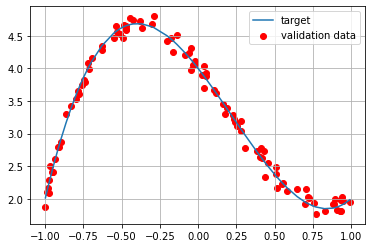

In [91]:
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

In [92]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(20, input_shape=(1,), activation = 'relu'))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(1, activation = 'relu'))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

<span style="color:green"> Funzionava già con 5 neuroni per layer, però così viene più preciso l'output.

In [93]:
# get a summary of our composed model
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 20)                40        
                                                                 
 dense_47 (Dense)            (None, 20)                420       
                                                                 
 dense_48 (Dense)            (None, 20)                420       
                                                                 
 dense_49 (Dense)            (None, 20)                420       
                                                                 
 dense_50 (Dense)            (None, 1)                 21        
                                                                 
Total params: 1321 (5.16 KB)
Trainable params: 1321 (5.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [94]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/30
32/32 [==============================] - 1s 14ms/step - loss: 2.8746 - mse: 2.8746 - val_loss: 0.7404 - val_mse: 0.7404
Epoch 2/30
32/32 [==============================] - 0s 6ms/step - loss: 0.5106 - mse: 0.5106 - val_loss: 0.6761 - val_mse: 0.6761
Epoch 3/30
32/32 [==============================] - 0s 6ms/step - loss: 0.3576 - mse: 0.3576 - val_loss: 0.5266 - val_mse: 0.5266
Epoch 4/30
32/32 [==============================] - 0s 6ms/step - loss: 0.2680 - mse: 0.2680 - val_loss: 0.3961 - val_mse: 0.3961
Epoch 5/30
32/32 [==============================] - 0s 6ms/step - loss: 0.2064 - mse: 0.2064 - val_loss: 0.3414 - val_mse: 0.3414
Epoch 6/30
32/32 [==============================] - 0s 6ms/step - loss: 0.1652 - mse: 0.1652 - val_loss: 0.2475 - val_mse: 0.2475
Epoch 7/30
32/32 [==============================] - 0s 6ms/step - loss: 0.1346 - mse: 0.1346 - val_loss: 0.2115 - val_mse: 0.2115
Epoch 8/30
32/32 [==============================] - 0s 6ms/step - loss: 0.1097 - mse: 0.1

In [95]:
# return weights and biases
# model.get_weights()

In [96]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4/4 [==============================] - 0s 4ms/step - loss: 0.0179 - mse: 0.0179

Test loss: 0.01794280856847763
Test accuracy: 0.01794280856847763


In [97]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4/4 [==============================] - 0s 5ms/step - loss: 0.0099 - mse: 0.0099

Test loss: 0.009875668212771416
Test accuracy: 0.009875668212771416


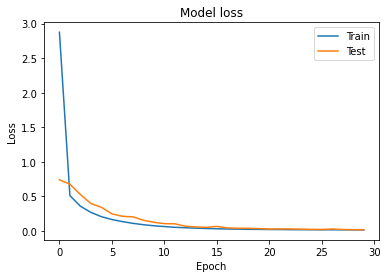

In [98]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

5/5 [==============================] - 0s 4ms/step


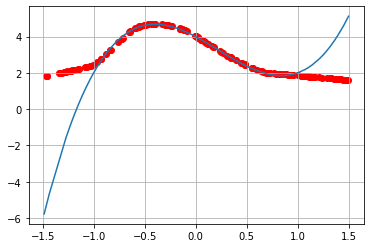

In [99]:
x_predicted = np.random.uniform(-1.5, 1.5, 150)
x_vera = np.random.uniform(-1.5, 1.5, 150)
x_vera.sort()
y_predicted = model.predict(x_predicted)
y_vera = a * x_vera**3 + b * x_vera**2 + c * x_vera + d
#print(x_predicted)
#print(y_predicted)
plt.plot(x_vera, y_vera)
plt.scatter(x_predicted, y_predicted,color='r')
plt.grid(True)
plt.show()

#### <span style="color:green"> Activation function = 'elu', Optimizer = 'Adadelta', Loss = 'mae'

<span style="color:green"> In questa simulazione ho aumentato ulteriormente $N_{train}$ ed $N_{valid}$ rispettivamente da 1000 a 6000 e da 100 a 600, lasciando invariati $\sigma=0.1$ ed $N_{epochs}=30$.

In [309]:
a = 3
b = -2
c = -3
d = 4

In [310]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 6000)
x_valid = np.random.uniform(-1, 1, 600)
x_valid.sort()
y_target = a * x_valid**3 + b * x_valid**2 + c * x_valid + d # ideal (target) linear function

sigma = 0.1 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(a * x_train**3 + b * x_train**2 + c * x_train + d, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(a * x_valid**3 + b * x_valid**2 + c * x_valid + d, sigma)

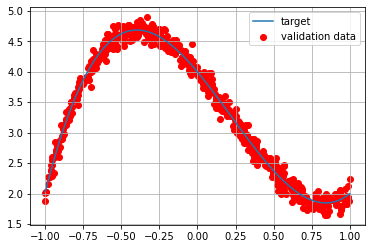

In [311]:
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

In [312]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(30, input_shape=(1,), activation = 'elu'))
model.add(Dense(30, activation = 'elu'))
model.add(Dense(30, activation = 'elu'))
model.add(Dense(30, activation = 'elu'))
model.add(Dense(30, activation = 'elu'))
model.add(Dense(30, activation = 'elu'))
model.add(Dense(30, activation = 'elu'))
model.add(Dense(30, activation = 'elu'))
model.add(Dense(30, activation = 'elu'))
model.add(Dense(1, activation = 'elu'))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='Adagrad', loss='mae', metrics=['mae'])

In [313]:
# get a summary of our composed model
model.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_210 (Dense)           (None, 30)                60        
                                                                 
 dense_211 (Dense)           (None, 30)                930       
                                                                 
 dense_212 (Dense)           (None, 30)                930       
                                                                 
 dense_213 (Dense)           (None, 30)                930       
                                                                 
 dense_214 (Dense)           (None, 30)                930       
                                                                 
 dense_215 (Dense)           (None, 30)                930       
                                                                 
 dense_216 (Dense)           (None, 30)              

In [314]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/30
188/188 [==============================] - 3s 7ms/step - loss: 2.2061 - mae: 2.2061 - val_loss: 0.7593 - val_mae: 0.7593
Epoch 2/30
188/188 [==============================] - 1s 5ms/step - loss: 0.5025 - mae: 0.5025 - val_loss: 0.4331 - val_mae: 0.4331
Epoch 3/30
188/188 [==============================] - 1s 5ms/step - loss: 0.4576 - mae: 0.4576 - val_loss: 0.4262 - val_mae: 0.4262
Epoch 4/30
188/188 [==============================] - 1s 5ms/step - loss: 0.4485 - mae: 0.4485 - val_loss: 0.4153 - val_mae: 0.4153
Epoch 5/30
188/188 [==============================] - 1s 5ms/step - loss: 0.4350 - mae: 0.4350 - val_loss: 0.4005 - val_mae: 0.4005
Epoch 6/30
188/188 [==============================] - 1s 5ms/step - loss: 0.4138 - mae: 0.4138 - val_loss: 0.3755 - val_mae: 0.3755
Epoch 7/30
188/188 [==============================] - 1s 5ms/step - loss: 0.3781 - mae: 0.3781 - val_loss: 0.3338 - val_mae: 0.3338
Epoch 8/30
188/188 [==============================] - 1s 5ms/step - loss: 0.

In [315]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

19/19 [==============================] - 0s 4ms/step - loss: 0.0951 - mae: 0.0951

Test loss: 0.09507183730602264
Test accuracy: 0.09507183730602264


In [316]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

19/19 [==============================] - 0s 4ms/step - loss: 0.0507 - mae: 0.0507

Test loss: 0.05072084441781044
Test accuracy: 0.05072084441781044


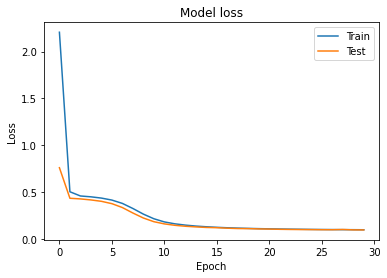

In [317]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

5/5 [==============================] - 0s 5ms/step


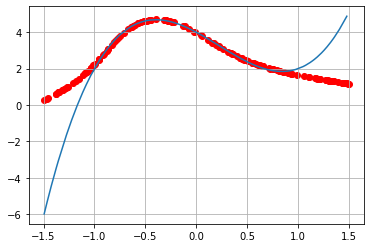

In [318]:
x_predicted = np.random.uniform(-1.5, 1.5, 150)
x_vera = np.random.uniform(-1.5, 1.5, 150)
x_vera.sort()
y_predicted = model.predict(x_predicted)
y_vera = a * x_vera**3 + b * x_vera**2 + c * x_vera + d
#print(x_predicted)
#print(y_predicted)
plt.plot(x_vera, y_vera)
plt.scatter(x_predicted, y_predicted,color='r')
plt.grid(True)
plt.show()

<span style="color:green"> Con la funzione di attivazione relu, l'optimizer sgd e la loss mse riesco ad ottenere un buon risultato con una rete con meno layer e meno nodi per layer e utilizzando meno dati di train e di validazione; se invece utilizzo elu, Adadelta e mae è necessaria una rete più complessa e molti più dati. Con entrambe le reti il risultato ottenuto è buono nel range di valori su cui la rete ha imparato a predire il valore della funzione, non lo è per niente al di fuori. 

### Exercise 11.3
  
Try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

Ideas to meditate on these exercises and judge your results can be found <a href=https://xkcd.com/2048/>here</a>

<span style="color:green"> In questa simulazione ho utilizzato $N_{train}=6000$, $N_{valid}=600$, $\sigma=0.1$ ed $N_{epochs}=30$. Sulla grandezza della rete sono andata sempre a tentativi. Ho utilizzato relu, sgd ed mse rispettivamente come funzione di attivazione, optimizer e loss.

In [386]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1.5, 1.5, (6000,2))
x_valid = np.random.uniform(-1.5, 1.5, (600,2))
y_target = np.sin(x_valid[:,0]**2 + x_valid[:,1]**2) # ideal (target) 

sigma = 0.1 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(np.sin(x_train[:,0]**2 + x_train[:,1]**2), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(np.sin(x_valid[:,0]**2 + x_valid[:,1]**2), sigma)

In [389]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(30, input_shape=(2,), activation = 'relu'))
model.add(Dense(30, activation = 'relu'))
model.add(Dense(30, activation = 'relu'))
model.add(Dense(30, activation = 'relu'))
model.add(Dense(30, activation = 'relu'))
model.add(Dense(30, activation = 'relu'))
model.add(Dense(30, activation = 'relu'))
model.add(Dense(30, activation = 'relu'))
model.add(Dense(30, activation = 'relu'))
model.add(Dense(1, activation = 'relu'))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [390]:
# get a summary of our composed model
model.summary()

Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_330 (Dense)           (None, 30)                90        
                                                                 
 dense_331 (Dense)           (None, 30)                930       
                                                                 
 dense_332 (Dense)           (None, 30)                930       
                                                                 
 dense_333 (Dense)           (None, 30)                930       
                                                                 
 dense_334 (Dense)           (None, 30)                930       
                                                                 
 dense_335 (Dense)           (None, 30)                930       
                                                                 
 dense_336 (Dense)           (None, 30)              

In [391]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/30
188/188 [==============================] - 3s 7ms/step - loss: 0.1760 - mse: 0.1760 - val_loss: 0.1491 - val_mse: 0.1491
Epoch 2/30
188/188 [==============================] - 1s 5ms/step - loss: 0.1523 - mse: 0.1523 - val_loss: 0.1477 - val_mse: 0.1477
Epoch 3/30
188/188 [==============================] - 1s 5ms/step - loss: 0.1504 - mse: 0.1504 - val_loss: 0.1458 - val_mse: 0.1458
Epoch 4/30
188/188 [==============================] - 1s 5ms/step - loss: 0.1481 - mse: 0.1481 - val_loss: 0.1435 - val_mse: 0.1435
Epoch 5/30
188/188 [==============================] - 1s 5ms/step - loss: 0.1453 - mse: 0.1453 - val_loss: 0.1408 - val_mse: 0.1408
Epoch 6/30
188/188 [==============================] - 1s 5ms/step - loss: 0.1421 - mse: 0.1421 - val_loss: 0.1376 - val_mse: 0.1376
Epoch 7/30
188/188 [==============================] - 1s 5ms/step - loss: 0.1370 - mse: 0.1370 - val_loss: 0.1318 - val_mse: 0.1318
Epoch 8/30
188/188 [==============================] - 1s 5ms/step - loss: 0.

In [392]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

19/19 [==============================] - 0s 4ms/step - loss: 0.0220 - mse: 0.0220

Test loss: 0.021970687434077263
Test accuracy: 0.021970687434077263


In [393]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

19/19 [==============================] - 0s 4ms/step - loss: 0.0123 - mse: 0.0123

Test loss: 0.01231340877711773
Test accuracy: 0.01231340877711773


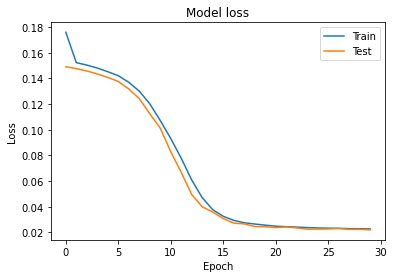

In [394]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

19/19 [==============================] - 0s 3ms/step


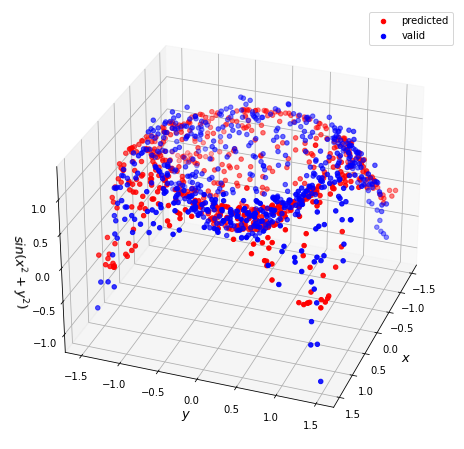

In [396]:
import matplotlib
import matplotlib.pyplot as plt
import math

x_predicted = np.random.uniform(-1.5,1.5, (600,2))
y_predicted = model.predict(x_predicted)
plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.scatter(x_predicted[:,0], x_predicted[:,1], y_predicted, marker='o', color='r', label='predicted')
ax.scatter(x_valid[:,0], x_valid[:,1], y_valid, color='b', label='valid')
ax.set_xlabel('$x$', fontsize=13)
ax.set_ylabel('$y$', fontsize=13)
ax.set_zlabel('$sin(x^2+y^2)$', fontsize=13)
#plt.title('Traiettoria punti $\mu$-$\sigma$ in funzione di $\\beta$', fontsize=20)
plt.legend()
ax.view_init(30, 20)

plt.show()

<span style="color:green"> Il risultato ottenuto è buono (i dati predetti rientrano nel range di training della rete).

### <span style="color:green">Supplementary material: Keras model.fit available callbacks</span>

The .fit method can also get <a href=https://keras.io/callbacks/>callback</a> functions which can be used to customize the fitting procedure with special actions.

Keras provides some predefined callbacks to feed in, among them for example:
- **TerminateOnNaN()**: that terminates training when a NaN loss is encountered
- **ModelCheckpoint(filepath)**: that save the model after every epoch
- **EarlyStopping()**: which stop training when a monitored quantity has stopped improving

You can select one or more callback and pass them as a list to the callback argument of the fit method.

Now we are going to construct a callback object to represent how estimated parameters are converging during the training procedure

In [12]:
from IPython.display import clear_output

class PlotCurrentEstimate(tf.keras.callbacks.Callback):
    def __init__(self, x_valid, y_valid):
        """Keras Callback which plot current model estimate against reference target"""
        
        # convert numpy arrays into lists for plotting purposes
        self.x_valid = list(x_valid[:])
        self.y_valid = list(y_valid[:])
        self.iter=0

    def on_epoch_end(self, epoch, logs={}):
        
        temp = self.model.predict(self.x_valid, batch_size=None, verbose=False, steps=None)
        self.y_curr = list(temp[:]) # convert numpy array into list
        
        self.iter+=1
        if self.iter%10 == 0:
            clear_output(wait=True)            
            self.eplot = plt.subplot(1,1,1)
            self.eplot.clear()     
            self.eplot.scatter(self.x_valid, self.y_curr, color="blue", s=4, marker="o", label="estimate")
            self.eplot.scatter(self.x_valid, self.y_valid, color="red", s=4, marker="x", label="valid")
            self.eplot.legend()

            plt.show()

We will use also an EarlyStopping callback on the val_loss quantity. This will stop the training process as soon as the val_loss quantity does not improve anymore after an amount of epochs, preventing a long time of wated computation to take over without useful results.

<code>keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)</code>

Arguments:

- <code>monitor</code>: quantity to be monitored. 
- <code>min_delta:</code> minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than min_delta, will count as no improvement. 
- <code>patience:</code> number of epochs with no improvement after which training will be stopped. 
- <code>verbose:</code> verbosity mode. 
- <code>mode:</code> one of {auto, min, max}. In min mode, training will stop when the quantity monitored has stopped decreasing; in max mode it will stop when the quantity monitored has stopped increasing; in auto mode, the direction is automatically inferred from the name of the monitored quantity. 
- <code>baseline:</code> Baseline value for the monitored quantity to reach. Training will stop if the model doesn't show improvement over the baseline. 
- <code>restore_best_weights:</code> whether to restore model weights from the epoch with the best value of the monitored quantity. If False, the model weights obtained at the last step of training are used.

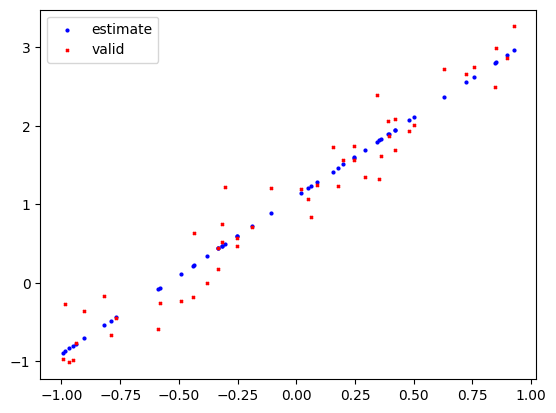

2/2 [==============================] - 0s 101ms/step - loss: 0.0808 - mse: 0.0808 - val_loss: 0.0808 - val_mse: 0.0808


[array([[2.0087578]], dtype=float32), array([1.1064383], dtype=float32)]

In [13]:
plot_estimate = PlotCurrentEstimate(x_valid, y_valid)

earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                  min_delta=0, patience=100, mode='auto')

model.fit(x_valid, y_valid, batch_size=32, epochs=150,
          validation_data=(x_valid, y_valid),
          callbacks=[ plot_estimate, earlystop]
          )

model.get_weights()